<a href="https://colab.research.google.com/github/Jeromeschmidt/cryptoTrader/blob/main/cryptoDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -r requirements.txt

In [ ]:
import gym
import numpy as np
import pandas as pd
import stable_baselines

In [ ]:
!pip install --upgrade stable-baselines[mpi]

Requirement already up-to-date: stable-baselines[mpi] in /usr/local/lib/python3.7/dist-packages (2.10.2)


In [ ]:
!pip install polygon-api-client
from polygon import RESTClient

In [ ]:
import requests

response = requests.get(url)


json = response.json()
print(json["results"])

[{'v': 74.10771043000001, 'vw': 11426.6213, 'o': 11443, 'c': 11428.07, 'h': 11447, 'l': 11406.8, 't': 1602633600000, 'n': 633}, {'v': 51.085647089999995, 'vw': 11424.0751, 'o': 11425.61, 'c': 11421.54, 'h': 11441.95710935, 'l': 11415.87, 't': 1602633900000, 'n': 364}, {'v': 381.05075413, 'vw': 11427.0621, 'o': 11429.58, 'c': 11445, 'h': 11453, 'l': 11419.91, 't': 1602634200000, 'n': 469}, {'v': 47.67064217999999, 'vw': 11448.9652, 'o': 11445, 'c': 11457.95, 'h': 11462, 'l': 11432.35, 't': 1602634500000, 'n': 482}, {'v': 36.31758232000001, 'vw': 11457.6321, 'o': 11462, 'c': 11457.73, 'h': 11467, 'l': 11444.37, 't': 1602634800000, 'n': 425}, {'v': 281.86127536000004, 'vw': 11448.1606, 'o': 11447.99, 'c': 11457.93, 'h': 11467, 'l': 11440.72, 't': 1602635100000, 'n': 435}, {'v': 27.239738250000002, 'vw': 11460.3804, 'o': 11458.8, 'c': 11460.35, 'h': 11467, 'l': 11449.39, 't': 1602635400000, 'n': 358}, {'v': 26.30997042, 'vw': 11466.5298, 'o': 11456.59, 'c': 11477.19404052, 'h': 11477.84110

# Goals:
The goal of this notebook is exploration of the data I will use for my crypto trading bot. I use the same data I will use to train and use BTCUSD to explore example data. I make requests to Polygon.io for 5 minute intervals if BTCUSD. 

Given that Polygon.io is a high quality and reliable source, we can assume that each datapoint is a accurate real-world occurance of a transaction. 

Temporary data spliting is done by dates. When data is sorted by time with oldest first: first 70% is to train, next 15% is to val, final 15% is to test. Next Step is to use GANs to generate synthetic data at each timestep and then split that into trains, validation, and testing data.

v - Transaction volume in window

vw - Volume weighted price in window

o - opening window price

c - closing window price

h - high window price

l - low window price

t - starting time of window

n - Number of transactions in window

In [ ]:
df = pd.DataFrame(json["results"])
df

,v,vw,o,c,h,l,t,n
0,74.107710,11426.6213,11443.00,11428.07,11447.000000,11406.80,1602633600000,633
1,51.085647,11424.0751,11425.61,11421.54,11441.957109,11415.87,1602633900000,364
2,381.050754,11427.0621,11429.58,11445.00,11453.000000,11419.91,1602634200000,469
3,47.670642,11448.9652,11445.00,11457.95,11462.000000,11432.35,1602634500000,482
4,36.317582,11457.6321,11462.00,11457.73,11467.000000,11444.37,1602634800000,425
...,...,...,...,...,...,...,...,...
284,77.721267,11425.4694,11414.63,11428.00,11444.000000,11407.47,1602718800000,666
285,322.983093,11415.4160,11419.75,11419.61,11439.000000,11410.40,1602719100000,465
286,199.481706,11414.6145,11413.10,11433.10,11442.000000,11410.48,1602719400000,452
287,41.027504,11432.4774,11432.81,11427.70,11445.000000,11414.92,1602719700000,500


In [ ]:
df["tic"] = "BTCUSD"
df

,v,vw,o,c,h,l,t,n,tic
0,74.107710,11426.6213,11443.00,11428.07,11447.000000,11406.80,1602633600000,633,BTCUSD
1,51.085647,11424.0751,11425.61,11421.54,11441.957109,11415.87,1602633900000,364,BTCUSD
2,381.050754,11427.0621,11429.58,11445.00,11453.000000,11419.91,1602634200000,469,BTCUSD
3,47.670642,11448.9652,11445.00,11457.95,11462.000000,11432.35,1602634500000,482,BTCUSD
4,36.317582,11457.6321,11462.00,11457.73,11467.000000,11444.37,1602634800000,425,BTCUSD
...,...,...,...,...,...,...,...,...,...
284,77.721267,11425.4694,11414.63,11428.00,11444.000000,11407.47,1602718800000,666,BTCUSD
285,322.983093,11415.4160,11419.75,11419.61,11439.000000,11410.40,1602719100000,465,BTCUSD
286,199.481706,11414.6145,11413.10,11433.10,11442.000000,11410.48,1602719400000,452,BTCUSD
287,41.027504,11432.4774,11432.81,11427.70,11445.000000,11414.92,1602719700000,500,BTCUSD


In [ ]:
df.describe()

,v,vw,o,c,h,l,t,n
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,2.890000e+02,289.000000
mean,133.617968,11404.323565,11405.710708,11405.443852,11422.374885,11391.680727,1.602677e+12,493.197232
std,144.209638,40.853152,41.026026,41.070531,41.556503,41.273180,2.507140e+07,348.509115
min,5.801996,11306.150600,11300.040000,11300.050000,11329.000000,11284.270000,1.602634e+12,95.000000
25%,37.408442,11384.555800,11384.290000,11385.170000,11404.000000,11370.240000,1.602655e+12,333.000000
50%,72.780166,11403.468100,11403.980000,11404.120000,11419.000000,11392.430000,1.602677e+12,435.000000
75%,181.702840,11426.621300,11428.010000,11427.700000,11446.084898,11415.740000,1.602698e+12,516.000000
max,953.227159,11533.858000,11550.963179,11549.000000,11564.000000,11516.180000,1.602720e+12,3574.000000


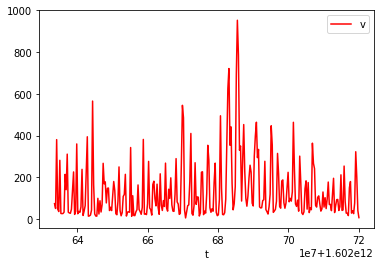

In [ ]:
# Plot of trade Volume over time
df.plot(kind='line',x='t',y='v',color='red')

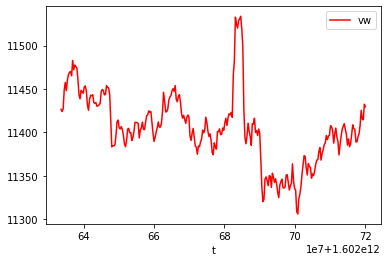

In [ ]:
# Plot of trade Volume weighted price over time
df.plot(kind='line',x='t',y='vw',color='red')

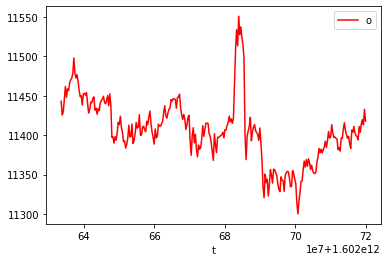

In [ ]:
# Plot of trade opening price over time
df.plot(kind='line',x='t',y='o',color='red')

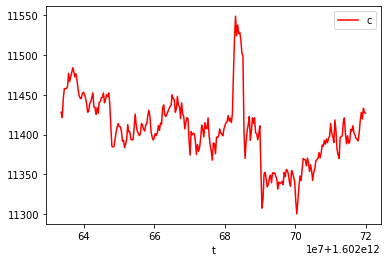

In [ ]:
# Plot of trade closing price over time
df.plot(kind='line',x='t',y='c',color='red')

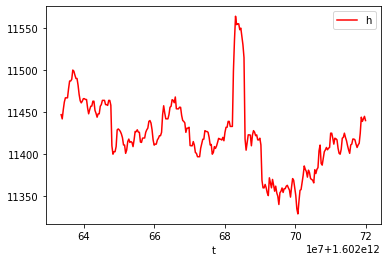

In [ ]:
# Plot of trade high price over time
df.plot(kind='line',x='t',y='h',color='red')

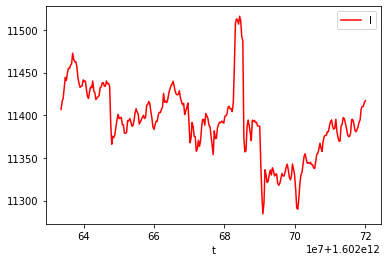

In [ ]:
# Plot of trade low price over time
df.plot(kind='line',x='t',y='l',color='red')

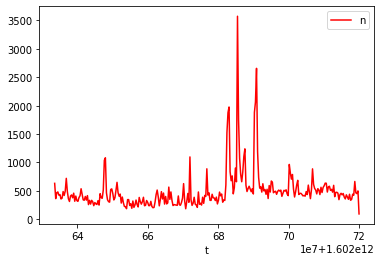

In [ ]:
# Plot of trade transaction numbers in window over time
df.plot(kind='line',x='t',y='n',color='red')

In [ ]:
# splitting data

In [ ]:
df.shape

(289, 9)

In [ ]:
train_size = int(df.shape[0] * .7)
train_size

202

In [ ]:
valid_size = int(df.shape[0] * .15)
valid_size

43

In [ ]:
test_size = df.shape[0] - train_size - valid_size
test_size

44

In [ ]:
train_df = df.iloc[:train_size,]
train_df

,v,vw,o,c,h,l,t,n,tic
0,74.107710,11426.6213,11443.00,11428.07,11447.000000,11406.80,1602633600000,633,BTCUSD
1,51.085647,11424.0751,11425.61,11421.54,11441.957109,11415.87,1602633900000,364,BTCUSD
2,381.050754,11427.0621,11429.58,11445.00,11453.000000,11419.91,1602634200000,469,BTCUSD
3,47.670642,11448.9652,11445.00,11457.95,11462.000000,11432.35,1602634500000,482,BTCUSD
4,36.317582,11457.6321,11462.00,11457.73,11467.000000,11444.37,1602634800000,425,BTCUSD
...,...,...,...,...,...,...,...,...,...
197,88.605807,11350.1804,11337.21,11345.38,11371.912292,11330.01,1602692700000,626,BTCUSD
198,93.105656,11349.6308,11356.09,11348.93,11365.764549,11335.84,1602693000000,501,BTCUSD
199,277.237389,11336.6087,11348.94,11339.28,11360.000000,11329.92,1602693300000,524,BTCUSD
200,45.732693,11353.0297,11339.21,11351.90,11370.000000,11338.39,1602693600000,440,BTCUSD


In [ ]:
valid_df = df.iloc[train_size+1:train_size+valid_size+1,]
valid_df

,v,vw,o,c,h,l,t,n,tic
203,59.796078,11346.5794,11352.400000,11347.790000,11362.000000,11330.73,1602694500000,594,BTCUSD
204,119.604809,11340.1879,11348.780000,11344.370000,11354.000000,11331.21,1602694800000,480,BTCUSD
205,447.378000,11330.8680,11338.510000,11331.230000,11349.990918,11320.24,1602695100000,674,BTCUSD
206,355.459336,11324.8637,11331.230000,11340.100000,11340.200000,11317.88,1602695400000,654,BTCUSD
207,32.397265,11339.1528,11328.250000,11338.030000,11354.130000,11320.06,1602695700000,468,BTCUSD
208,39.006484,11343.3279,11347.110000,11339.470000,11356.000000,11325.51,1602696000000,487,BTCUSD
209,46.967992,11346.1143,11343.420000,11341.150000,11359.850451,11331.68,1602696300000,494,BTCUSD
210,86.056876,11336.3091,11342.190000,11337.000000,11354.500000,11328.85,1602696600000,440,BTCUSD
211,314.899284,11335.9661,11328.710000,11352.190000,11359.000000,11328.71,1602696900000,491,BTCUSD
212,216.848407,11337.0815,11348.820000,11347.050000,11359.000000,11333.08,1602697200000,514,BTCUSD


In [ ]:
test_df = df.iloc[train_size+valid_size+1:,]
test_df

,v,vw,o,c,h,l,t,n,tic
246,242.070306,11368.1362,11382.270000,11376.990000,11389.007019,11361.54,1602707400000,543,BTCUSD
247,66.044400,11375.5436,11377.470000,11386.774871,11387.000000,11357.58,1602707700000,516,BTCUSD
248,57.785378,11379.7095,11381.500000,11385.250000,11395.000000,11369.70,1602708000000,447,BTCUSD
249,104.511859,11385.8293,11385.250000,11392.420000,11403.000000,11375.22,1602708300000,539,BTCUSD
250,111.304126,11387.9481,11392.430000,11387.890000,11405.080041,11376.40,1602708600000,515,BTCUSD
251,72.264576,11396.4627,11384.430000,11394.420000,11408.000000,11376.42,1602708900000,435,BTCUSD
252,38.336382,11391.7828,11393.100000,11389.860000,11405.202546,11380.73,1602709200000,564,BTCUSD
253,49.205387,11395.7010,11404.610212,11395.460000,11407.104364,11380.77,1602709500000,471,BTCUSD
254,130.053948,11396.8846,11396.260000,11397.950000,11408.055273,11387.69,1602709800000,560,BTCUSD
255,57.695112,11407.7496,11397.950000,11414.010000,11425.000000,11392.43,1602710100000,591,BTCUSD


In [ ]:
tickers = ["BTCUSD"]#, "ETHUSD"]

for tic in tickers:

  response2 = requests.get(url2)

  json_dump = response2.json()
  print(json_dump)
  temp = pd.DataFrame(json_dump["results"])
  temp["tic"] = tic
  df = pd.concat([df, temp])
  print(json_dump["results"])

df

{'ticker': 'X:BTCUSD', 'queryCount': 398, 'resultsCount': 398, 'adjusted': True, 'results': [{'v': 28342.81488574, 'vw': 8306.6397, 'o': 8280, 'c': 8354.6, 'h': 8428.2, 'l': 8212.43, 't': 1571011200000, 'n': 113670}, {'v': 37701.35026529096, 'vw': 8243.9763, 'o': 8355, 'c': 8191.1, 'h': 8439.7, 'l': 8060.5, 't': 1571097600000, 'n': 131199}, {'v': 48427.84904880585, 'vw': 8038.7276, 'o': 8162.44, 'c': 7993.54, 'h': 8204.3, 'l': 7908.86, 't': 1571184000000, 'n': 151797}, {'v': 29522.837585771045, 'vw': 8045.8058, 'o': 7995.81, 'c': 8077.1, 'h': 8150.5326571, 'l': 7935.15, 't': 1571270400000, 'n': 131788}, {'v': 35572.27733157104, 'vw': 7941.811, 'o': 8070.74, 'c': 7956.4, 'h': 8135.11397057, 'l': 7811.62, 't': 1571356800000, 'n': 152186}, {'v': 28560.55408010027, 'vw': 7969.9025, 'o': 7950.65, 'c': 7965.28, 'h': 8119.5, 'l': 7867.75, 't': 1571443200000, 'n': 118735}, {'v': 33674.56822371961, 'vw': 8077.4191, 'o': 7965.27, 'c': 8240.2, 'h': 8337, 'l': 7870.01, 't': 1571529600000, 'n': 132

,v,vw,o,c,h,l,t,n,tic
0,74.107710,11426.6213,11443.000000,11428.07,11447.000000,11406.80,1602633600000,633,BTCUSD
1,51.085647,11424.0751,11425.610000,11421.54,11441.957109,11415.87,1602633900000,364,BTCUSD
2,381.050754,11427.0621,11429.580000,11445.00,11453.000000,11419.91,1602634200000,469,BTCUSD
3,47.670642,11448.9652,11445.000000,11457.95,11462.000000,11432.35,1602634500000,482,BTCUSD
4,36.317582,11457.6321,11462.000000,11457.73,11467.000000,11444.37,1602634800000,425,BTCUSD
...,...,...,...,...,...,...,...,...,...
393,48054.329857,15308.6096,15342.100000,15315.04,15482.760000,15075.00,1604966400000,238863,BTCUSD
394,49545.036322,15651.1455,15295.010000,15705.79,16000.000000,15273.12,1605052800000,263059,BTCUSD
395,79501.651431,15948.0233,15709.000000,16310.81,16370.890000,15446.82,1605139200000,369380,BTCUSD
396,50271.789393,16275.0692,16296.000000,16339.56,16494.520000,15953.00,1605225600000,278153,BTCUSD


In [ ]:
# This converts the unix timestep to year-month-day
from datetime import datetime

final_prices = df.sort_values(by=['t'])

for index, row in df.iterrows():
    year = str(datetime.fromtimestamp(int(row['t'])/1000).year)
    month = str(datetime.fromtimestamp(int(row['t'])/1000).month)
    if len(month) == 1:
        month = "0" + month
    day = str(datetime.fromtimestamp(int(row['t'])/1000).day)
    if len(day) == 1:
        day = "0" + day
    # print(year+month+day)
    # row['datadate'] = year+month+day
    final_prices.at[index, 'datadate'] = year+month+day

final_prices = final_prices.reset_index()
final_prices = final_prices.drop(["index"], axis=1)
final_prices = final_prices.drop_duplicates()

In [ ]:
final_prices

,v,vw,o,c,h,l,t,n,tic,datadate
0,28342.814886,8306.6397,8280.000000,8354.60,8428.200000,8212.43,1571011200000,113670,BTCUSD,20191014
1,37701.350265,8243.9763,8355.000000,8191.10,8439.700000,8060.50,1571097600000,131199,BTCUSD,20191015
2,48427.849049,8038.7276,8162.440000,7993.54,8204.300000,7908.86,1571184000000,151797,BTCUSD,20191016
3,29522.837586,8045.8058,7995.810000,8077.10,8150.532657,7935.15,1571270400000,131788,BTCUSD,20191017
4,35572.277332,7941.8110,8070.740000,7956.40,8135.113971,7811.62,1571356800000,152186,BTCUSD,20191018
...,...,...,...,...,...,...,...,...,...,...
682,48054.329857,15308.6096,15342.100000,15315.04,15482.760000,15075.00,1604966400000,238863,BTCUSD,20201110
683,49545.036322,15651.1455,15295.010000,15705.79,16000.000000,15273.12,1605052800000,263059,BTCUSD,20201111
684,79501.651431,15948.0233,15709.000000,16310.81,16370.890000,15446.82,1605139200000,369380,BTCUSD,20201112
685,50271.789393,16275.0692,16296.000000,16339.56,16494.520000,15953.00,1605225600000,278153,BTCUSD,20201113


In [129]:
from stable_baselines import DDPG

from stable_baselines.ddpg.policies import DDPGPolicy

from stable_baselines.common.policies import MlpLstmPolicy

from stable_baselines.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

In [ ]:
from stable_baselines.common.vec_env import DummyVecEnv
from EnvMultipleCrypto import CrpytoEnvTrain
env = CrpytoEnvTrain

In [ ]:
df=final_prices.sort_values(['datadate', 'tic'],ignore_index=True)
df.index = df.datadate.factorize()[0]
df

,v,vw,o,c,h,l,t,n,tic,datadate
0,28342.814886,8306.6397,8280.000000,8354.60,8428.200000,8212.43,1571011200000,113670,BTCUSD,20191014
0,74.107710,11426.6213,11443.000000,11428.07,11447.000000,11406.80,1602633600000,633,BTCUSD,20191014
1,37701.350265,8243.9763,8355.000000,8191.10,8439.700000,8060.50,1571097600000,131199,BTCUSD,20191015
1,51.085647,11424.0751,11425.610000,11421.54,11441.957109,11415.87,1602633900000,364,BTCUSD,20191015
2,48427.849049,8038.7276,8162.440000,7993.54,8204.300000,7908.86,1571184000000,151797,BTCUSD,20191016
...,...,...,...,...,...,...,...,...,...,...
393,48054.329857,15308.6096,15342.100000,15315.04,15482.760000,15075.00,1604966400000,238863,BTCUSD,20201110
394,49545.036322,15651.1455,15295.010000,15705.79,16000.000000,15273.12,1605052800000,263059,BTCUSD,20201111
395,79501.651431,15948.0233,15709.000000,16310.81,16370.890000,15446.82,1605139200000,369380,BTCUSD,20201112
396,50271.789393,16275.0692,16296.000000,16339.56,16494.520000,15953.00,1605225600000,278153,BTCUSD,20201113


In [ ]:
df = df.reset_index()
df = df.drop(["index"], axis=1)

In [ ]:
# Data for some reason had mulitple values for some days so this removes those
tics = dict()
to_drop = list()

for index, row in df.iterrows():
  if row["tic"] in tics:
    if row["datadate"] in tics[row["tic"]]:
      to_drop.append(index)
    else:
      tics[row["tic"]].append(row["datadate"])
  else:
    tics[row["tic"]] = [row["datadate"]]

print(to_drop)
df = df.drop(to_drop)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311, 313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337, 339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 361, 363, 365, 367, 369, 371, 373, 375, 377, 379, 381, 383, 385, 387, 389, 391, 393, 395, 397, 399, 401, 403, 405, 407, 409, 411, 413, 415, 417, 419, 421,

In [ ]:
df

,v,vw,o,c,h,l,t,n,tic,datadate
0,28342.814886,8306.6397,8280.000000,8354.60,8428.200000,8212.43,1571011200000,113670,BTCUSD,20191014
2,37701.350265,8243.9763,8355.000000,8191.10,8439.700000,8060.50,1571097600000,131199,BTCUSD,20191015
4,48427.849049,8038.7276,8162.440000,7993.54,8204.300000,7908.86,1571184000000,151797,BTCUSD,20191016
6,29522.837586,8045.8058,7995.810000,8077.10,8150.532657,7935.15,1571270400000,131788,BTCUSD,20191017
8,35572.277332,7941.8110,8070.740000,7956.40,8135.113971,7811.62,1571356800000,152186,BTCUSD,20191018
...,...,...,...,...,...,...,...,...,...,...
682,48054.329857,15308.6096,15342.100000,15315.04,15482.760000,15075.00,1604966400000,238863,BTCUSD,20201110
683,49545.036322,15651.1455,15295.010000,15705.79,16000.000000,15273.12,1605052800000,263059,BTCUSD,20201111
684,79501.651431,15948.0233,15709.000000,16310.81,16370.890000,15446.82,1605139200000,369380,BTCUSD,20201112
685,50271.789393,16275.0692,16296.000000,16339.56,16494.520000,15953.00,1605225600000,278153,BTCUSD,20201113


In [ ]:
df = df.reset_index()
df

,index,v,vw,o,c,h,l,t,n,tic,datadate
0,0,28342.814886,8306.6397,8280.000000,8354.60,8428.200000,8212.43,1571011200000,113670,BTCUSD,20191014
1,2,37701.350265,8243.9763,8355.000000,8191.10,8439.700000,8060.50,1571097600000,131199,BTCUSD,20191015
2,4,48427.849049,8038.7276,8162.440000,7993.54,8204.300000,7908.86,1571184000000,151797,BTCUSD,20191016
3,6,29522.837586,8045.8058,7995.810000,8077.10,8150.532657,7935.15,1571270400000,131788,BTCUSD,20191017
4,8,35572.277332,7941.8110,8070.740000,7956.40,8135.113971,7811.62,1571356800000,152186,BTCUSD,20191018
...,...,...,...,...,...,...,...,...,...,...,...
393,682,48054.329857,15308.6096,15342.100000,15315.04,15482.760000,15075.00,1604966400000,238863,BTCUSD,20201110
394,683,49545.036322,15651.1455,15295.010000,15705.79,16000.000000,15273.12,1605052800000,263059,BTCUSD,20201111
395,684,79501.651431,15948.0233,15709.000000,16310.81,16370.890000,15446.82,1605139200000,369380,BTCUSD,20201112
396,685,50271.789393,16275.0692,16296.000000,16339.56,16494.520000,15953.00,1605225600000,278153,BTCUSD,20201113


In [ ]:
df = df.drop("index", axis=1)
df

,v,vw,o,c,h,l,t,n,tic,datadate
0,28342.814886,8306.6397,8280.000000,8354.60,8428.200000,8212.43,1571011200000,113670,BTCUSD,20191014
1,37701.350265,8243.9763,8355.000000,8191.10,8439.700000,8060.50,1571097600000,131199,BTCUSD,20191015
2,48427.849049,8038.7276,8162.440000,7993.54,8204.300000,7908.86,1571184000000,151797,BTCUSD,20191016
3,29522.837586,8045.8058,7995.810000,8077.10,8150.532657,7935.15,1571270400000,131788,BTCUSD,20191017
4,35572.277332,7941.8110,8070.740000,7956.40,8135.113971,7811.62,1571356800000,152186,BTCUSD,20191018
...,...,...,...,...,...,...,...,...,...,...
393,48054.329857,15308.6096,15342.100000,15315.04,15482.760000,15075.00,1604966400000,238863,BTCUSD,20201110
394,49545.036322,15651.1455,15295.010000,15705.79,16000.000000,15273.12,1605052800000,263059,BTCUSD,20201111
395,79501.651431,15948.0233,15709.000000,16310.81,16370.890000,15446.82,1605139200000,369380,BTCUSD,20201112
396,50271.789393,16275.0692,16296.000000,16339.56,16494.520000,15953.00,1605225600000,278153,BTCUSD,20201113


In [ ]:
df.reset_index()
df.loc[1,:]

v                 37701.4
vw                8243.98
o                    8355
c                  8191.1
h                  8439.7
l                  8060.5
t           1571097600000
n                  131199
tic                BTCUSD
datadate         20191015
Name: 1, dtype: object

In [ ]:
# Splits our data for training
train_size = int(df.shape[0] * .7)
valid_size = int(df.shape[0] * .15)
test_size = df.shape[0] - train_size - valid_size

train_df = df.iloc[:train_size,]
valid_df = df.iloc[train_size+1:train_size+valid_size+1,]
test_df = df.iloc[train_size+valid_size+1:,]

In [ ]:
# Fixes indices for new splits
valid_df = valid_df.reset_index()
valid_df = valid_df.drop("index", axis=1)
test_df = test_df.reset_index()
test_df = test_df.drop("index", axis=1)

In [ ]:
env_train = DummyVecEnv([lambda: CrpytoEnvTrain(train_df)])

v                 28342.8
vw                8306.64
o                    8280
c                  8354.6
h                  8428.2
l                 8212.43
t           1571011200000
n                  113670
tic                BTCUSD
datadate         20191014
Name: 0, dtype: object


In [ ]:
env_val = DummyVecEnv([lambda: CrpytoEnvTrain(valid_df)])
obs_val = env_val.reset()

v                   25022
vw                9158.06
o                 9175.83
c                  9231.2
h                    9299
l                    9105
t           1595116800000
n                  127111
tic                BTCUSD
datadate         20200719
Name: 0, dtype: object


DDPG model:

In [ ]:
import time
def train_DDPG(env_train, model_name, timesteps=10000):
    """DDPG model"""

    # add the noise objects for DDPG
    n_actions = env_train.action_space.shape[-1]
    param_noise = None
    action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))

    start = time.time()
    model = DDPG('MlpPolicy', env_train, param_noise=param_noise, action_noise=action_noise)
    model.learn(total_timesteps=timesteps)
    end = time.time()

    # model.save(f"{config.TRAINED_MODEL_DIR}/{model_name}")
    print('Training time (DDPG): ', (end-start)/60,' minutes')
    return model

In [ ]:
modelDDPG = train_DDPG(env_train, model_name="DDPG MODEL", timesteps=10000)

Training time (DDPG):  0.6361702640851339  minutes


In [ ]:
def DRL_validation(model, test_data, test_env, test_obs) -> None:
    for i in range(len(test_data.index.unique())):
        action, _states = model.predict(test_obs)
        test_obs, rewards, dones, info = test_env.step(action)

In [ ]:
def get_validation_sharpe():
    ###Calculate Sharpe ratio based on validation results###
    df_total_value = pd.read_csv('results/account_value_train.csv', index_col=0)
    df_total_value.columns = ['account_value_train']
    df_total_value['daily_return'] = df_total_value.pct_change(1)
    if df_total_value['daily_return'].std() > 0:
      sharpe = (4 ** 0.5) * df_total_value['daily_return'].mean() / \
              df_total_value['daily_return'].std()
    else:
      sharpe = (4 ** 0.5) * df_total_value['daily_return'].mean() / 1
    return sharpe

In [ ]:
DRL_validation(model=modelDDPG, test_data=test_df, test_env=env_val, test_obs=obs_val)
sharpe = get_validation_sharpe()
print(sharpe)

0.3952553452877639


PPO Model:

In [ ]:
from stable_baselines import PPO2

def train_PPO(env_train, model_name, timesteps=50000):
    """PPO model"""

    start = time.time()
    model = PPO2('MlpPolicy', env_train, ent_coef = 0.005, nminibatches = 8)
    #model = PPO2('MlpPolicy', env_train, ent_coef = 0.005)

    model.learn(total_timesteps=timesteps)
    end = time.time()

    print('Training time (PPO): ', (end - start) / 60, ' minutes')
    return model

In [ ]:
modelPPO = train_PPO(env_train, model_name="PPO", timesteps=100000)

Training time (PPO):  2.8306363662083944  minutes


In [ ]:
env_val = DummyVecEnv([lambda: CrpytoEnvTrain(valid_df)])
obs_val = env_val.reset()

v                   25022
vw                9158.06
o                 9175.83
c                  9231.2
h                    9299
l                    9105
t           1595116800000
n                  127111
tic                BTCUSD
datadate         20200719
Name: 0, dtype: object


In [ ]:
DRL_validation(model=modelPPO, test_data=test_df, test_env=env_val, test_obs=obs_val)
sharpe = get_validation_sharpe()
print(sharpe)

0.3952553452877639


Given the two models Sharpe ratios, DDPG performed better with a 0.3952553452877639 sharpe ratio vs a 0.3456396847587437 sharpe ratio

Try different parameters for each model

In [ ]:
import time
def train_DDPG2(env_train, model_name, timesteps=10000):
    """DDPG model"""

    # add the noise objects for DDPG
    n_actions = env_train.action_space.shape[-1]
    param_noise = None
    action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))

    start = time.time()
    model = DDPG('MlpPolicy', env_train, param_noise=param_noise, action_noise=action_noise)
    model.learn(total_timesteps=timesteps)
    end = time.time()

    # model.save(f"{config.TRAINED_MODEL_DIR}/{model_name}")
    print('Training time (DDPG): ', (end-start)/60,' minutes')
    return model

In [ ]:
modelDDPG2 = train_DDPG2(env_train, model_name="DDPG MODEL", timesteps=10000)

Training time (DDPG):  0.6343941966692607  minutes


In [ ]:
def DRL_validation(model, test_data, test_env, test_obs) -> None:
    for i in range(len(test_data.index.unique())):
        action, _states = model.predict(test_obs)
        test_obs, rewards, dones, info = test_env.step(action)

In [ ]:
DRL_validation(model=modelDDPG2, test_data=test_df, test_env=env_val, test_obs=obs_val)
sharpe = get_validation_sharpe()
print(sharpe)

0.016707959923602154


In [132]:
from stable_baselines import PPO2

def train_PPO(env_train, model_name, timesteps=50000):
    """PPO model"""

    start = time.time()
    model = PPO2('MlpLstmPolicy', env_train, ent_coef = 0.005, nminibatches = 1)
    #model = PPO2('MlpPolicy', env_train, ent_coef = 0.005)

    model.learn(total_timesteps=timesteps)
    end = time.time()

    print('Training time (PPO): ', (end - start) / 60, ' minutes')
    return model

In [133]:
modelPPO = train_PPO(env_train, model_name="PPO", timesteps=100000)

Training time (PPO):  9.607848314444224  minutes


In [134]:
env_val = DummyVecEnv([lambda: CrpytoEnvTrain(valid_df)])
obs_val = env_val.reset()

v                   25022
vw                9158.06
o                 9175.83
c                  9231.2
h                    9299
l                    9105
t           1595116800000
n                  127111
tic                BTCUSD
datadate         20200719
Name: 0, dtype: object


In [135]:
DRL_validation(model=modelPPO, test_data=test_df, test_env=env_val, test_obs=obs_val)
sharpe = get_validation_sharpe()
print(sharpe)

0.24474037247723238


From our models, the model with the highest Sharpe ratio was DDPG using OrnsteinUhlenbeckActionNoise. The Sharpe ratio was 0.3952553452877639

In [140]:
# Testing data

env_test = DummyVecEnv([lambda: CrpytoEnvTrain(test_df)])
obs_trade = env_test.reset()

for i in range(len(test_df.index.unique())):
    action, _states = modelDDPG.predict(obs_trade)
    obs_trade, rewards, dones, info = env_test.step(action)
    if i == (len(test_df.index.unique()) - 2):
        # print(env_test.render())
        last_state = env_test.render()

df_last_state = pd.DataFrame({'last_state': last_state})
df_last_state.to_csv('results/last_state')
last_state

v                 56594.7
vw                10917.1
o                   10798
c                 10951.1
h                   11105
l                   10662
t           1600214400000
n                  206980
tic                BTCUSD
datadate         20200916
Name: 0, dtype: object


[5498.7521216070745,
 39764.4356405624,
 17.0,
 16308.5948109,
 16083.07,
 15987.2139,
 222527]

Portfolio value is 17 * the price(vw) = 271782.6363